In [20]:
import numpy as np
import cPickle

In [21]:
a = cPickle.load(open('results_10dim_51runs_NSSDE.pickle', 'rb'))


EOFError: 

In [ ]:
a.keys()

In [18]:
a[np.where(a!=1)]

array([ 2.,  3.])

In [16]:
a.astype(np.int)

array([1, 2, 3])

In [71]:
import numpy as np
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
plt.style.use('classic')

import sys
sys.path.append('/home/micael/MyWorkspace/DEStudy/algorithms')
from NSSDE import *

In [2]:
def Sphere(array1D):
    return np.sum(array1D**2)

In [3]:
function = pg.problem(pg.ackley( dim=30))

In [4]:
def Ackley(array1D):
    return function.fitness(array1D)

In [5]:
max_ef = int(1e5)

In [32]:
Sphere_problem = NSSDE(bounds=[-100, 100], global_max=0.0, MaxEF=max_ef, fitness=Sphere)
Ackley_problem = NSSDE(bounds=[-32, 32], global_max=0.0, MaxEF=max_ef, fitness=Ackley)

In [33]:
ev_sphere = Sphere_problem.evolution()
ev_ackley = Ackley_problem.evolution()

In [35]:
ev_ackley['Function Evals']

100000

In [72]:
ev_sphere['log'][-1], ev_ackley['log'][-1]

((99999,
  1.1705268850202464e-51,
  4.9065847950196274e-51,
  1.1284100092699566e-51,
  7.2910114347121152e-51,
  5.0013217714240551e-51,
  array([ 0.24768358]),
  array([ 0.82630849])),
 (99999,
  3.9968028886505635e-15,
  3.9968028886505635e-15,
  0.0,
  3.9968028886505635e-15,
  3.9968028886505635e-15,
  array([ 0.32938024]),
  array([ 0.85237408])))

In [37]:
percent = np.int(0.1*max_ef)

In [45]:
global_minimum = 0.0

In [40]:
checkpoints = [0]+[percent*i for i in range(1, 11)]
checkpoints

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [64]:
sphere_r = []
ackley_r = []
for icheck in checkpoints:
    if icheck == 100000:
        sphere_r.append(ev_sphere['log'][icheck-1][1]- global_minimum)
        ackley_r.append(ev_ackley['log'][icheck-1][1]- global_minimum)
    else:
        sphere_r.append(ev_sphere['log'][icheck][1]- global_minimum)
        ackley_r.append(ev_ackley['log'][icheck][1]- global_minimum)
        

In [66]:
path_to_save = '/home/micael/Documents/Cadeiras_Mestrado/TopicosEspeciaisSistemasInteligentes/Seminario1/'

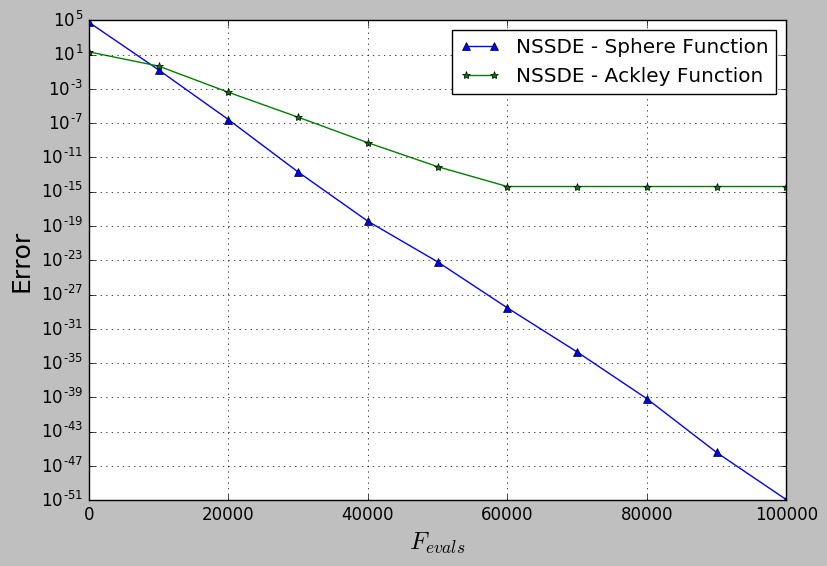

In [70]:
plt.figure(figsize=(9, 6))
plt.plot(checkpoints, sphere_r, '-^', label='NSSDE - Sphere Function')
plt.plot(checkpoints, ackley_r, '-*', label='NSSDE - Ackley Function')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Error', fontsize=18)
plt.xlabel(r'$F_{evals}$', fontsize=18)
plt.grid()
plt.savefig(path_to_save+'primeiro_teste.pdf')
plt.show()